In [1]:
!ls
# Numerical Imporst 
import pandas as pd
import numpy as np
import scipy 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Python 
import os

# sklearn 
from sklearn.metrics import f1_score # f1_score(y_true, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# scipy
from scipy.cluster import hierarchy as hc # for dendograms 



final_after_na.ipynb  Full-Copy4.ipynb	Full.ipynb	    sum_tab_1.csv
final.ipynb	      Full-Copy5.ipynb	NA.ipynb	    test_cli.tsv
Full-Copy10.ipynb     Full-Copy6.ipynb	output.csv	    test_pro.tsv
Full-Copy1.ipynb      Full-Copy7.ipynb	README.txt	    train_cli.tsv
Full-Copy2.ipynb      Full-Copy8.ipynb	start.ipynb	    train_pro.tsv
Full-Copy3.ipynb      Full-Copy9.ipynb	subchallenge_1.csv


In [2]:
df_train_pro = pd.read_table(f'{os.getcwd()}/train_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_pro = pd.read_table(f'{os.getcwd()}/test_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_cli = pd.read_csv(f'{os.getcwd()}/train_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_test_cli = pd.read_csv(f'{os.getcwd()}/test_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_train_mislabel = pd.read_csv(f'{os.getcwd()}/sum_tab_1.csv', 
                           low_memory=False,)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
# df_train_pro
# df_test_pro
# df_train_cli
# df_test_cli
# df_train_mislabel

In [5]:
# Come back to the way you handle this NA, sophisticated way will imporve by at least 5% 
train_pro = df_train_pro.copy(deep=True)
train_pro = train_pro.fillna(train_pro.mean())
train_pro.index.name = 'sample'


test_pro = df_test_pro.copy(deep=True)
test_pro = test_pro.fillna(test_pro.mean())
test_pro.index.name = 'sample'

# df_train_pro
# train_pro
# df_test_pro
# test_pro

In [11]:
train_cli = df_train_cli.copy(deep=True)
train_cli = train_cli.set_index('sample')
train_cli = train_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

test_cli = df_test_cli.copy(deep=True)
test_cli = test_cli.set_index('sample')
test_cli = test_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})
# df_train_cli
# train_cli
# df_test_cli
# test_cli

In [12]:
train_mislabel = df_train_mislabel.copy(deep=True)
train_mislabel = train_mislabel.set_index('sample')

# df_train_mislabel
# train_mislabel

In [14]:
train_pro.reset_index(drop=True, inplace=True)
train_cli.reset_index(drop=True, inplace=True)
train_mislabel.reset_index(drop=True, inplace=True)
# train_pro
# train_cli
# train_mislabel
train_combined = pd.concat([train_mislabel, train_cli, train_pro], axis=1)
# train_combined

In [18]:
train_combined_correct = train_combined.loc[train_combined['mismatch'] == 0]
X_correct = train_combined_correct.drop(['mismatch'], axis=1, inplace=False)
X_correct.reset_index(drop=True, inplace=True)

gender_correct = X_correct['gender']
msi_correct = X_correct['msi']
X_correct = X_correct.drop(['gender', 'msi'], axis=1, inplace=False)

columns = X_correct.columns

# X_correct
# gender_correct
# msi_correct

In [16]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_pro.values.astype(int), 
#                                                      train_cli['gender'].values, 
#                                                      train_cli['msi'].values, 
#                                                      test_size=0.3, 
#                                                      random_state=0,)

X_gender_train, X_gender_valid, y_gender_train, y_gender_valid = train_test_split(X_correct.values.astype(int),
                                                                                  gender_correct, 
                                                                                  test_size=0.3)


# X_train
# X_valid
# y_train
# y_valid

In [ ]:
forest = RandomForestClassifier(n_estimators=500, 
                                n_jobs=-1, 
                                oob_score=True)

# sorted(forest.get_params().keys())

gs = GridSearchCV(estimator=forest,
                  param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
                               'max_features':[None, 0.5, 'sqrt', 'log2']}],
                  scoring='accuracy',
                  cv=5,)

gs = gs.fit(X_gender_train, y_gender_train)
print(gs.best_score_)
print(gs.best_params_)


 1) HSPA2                          0.035714
 2) SNRPA                          0.026962
 3) COG3                           0.025246
 4) FLNC                           0.020027
 5) GADD45GIP1                     0.019792
 6) MCAM                           0.019566
 7) ARFIP1                         0.018170
 8) MRPL9                          0.013516
 9) PGM5                           0.013486
10) AP2S1                          0.011152
11) CISD1                          0.011100
12) AGRN                           0.010416
13) COG4                           0.010129
14) IGLL5                          0.009944
15) PPP1CC                         0.009905
16) SERPINB1                       0.009259
17) TPD52                          0.008477
18) MRPL16                         0.008298
19) AOC3                           0.008282
20) MAP2K2                         0.007944
21) DYNLL1                         0.007848
22) IKBIP                          0.006997
23) TTC37                       

<BarContainer object of 4118 artists>

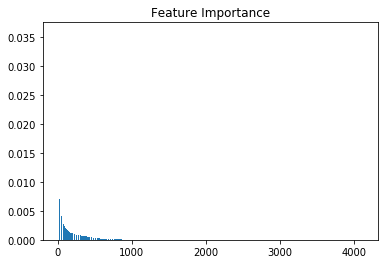

In [19]:
gender_forest = RandomForestClassifier(n_estimators=500,
                                min_samples_leaf=3,
                                max_features=None,
                                n_jobs=-1, 
                                oob_score=True)
gender_forest.fit(X_gender_train, y_gender_train)

gender_importances = gender_forest.feature_importances_
gender_indices = np.argsort(gender_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(100):
    print("%2d) %-*s %f" % (f + 1, 30, columns[gender_indices[f]], gender_importances[gender_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_gender_train.shape[1]), gender_importances[gender_indices], align='center')

In [20]:
y_gender_pred = gender_forest.predict(X_gender_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.67      0.40      0.50         5
          1       0.83      0.94      0.88        16

avg / total       0.79      0.81      0.79        21



In [21]:
gender_select = SelectFromModel(gender_forest, threshold=0.019)

gender_select.fit(X_gender_train, y_gender_train)

X_gender_important_train = gender_select.transform(X_gender_train)
X_gender_important_train_df = pd.DataFrame(X_gender_important_train)
X_gender_important_valid = gender_select.transform(X_gender_valid)

In [22]:
gender_forest.fit(X_gender_important_train, y_gender_train)
y_pred = gender_forest.predict(X_gender_important_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))


k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.67      0.40      0.50         5
          1       0.83      0.94      0.88        16

avg / total       0.79      0.81      0.79        21



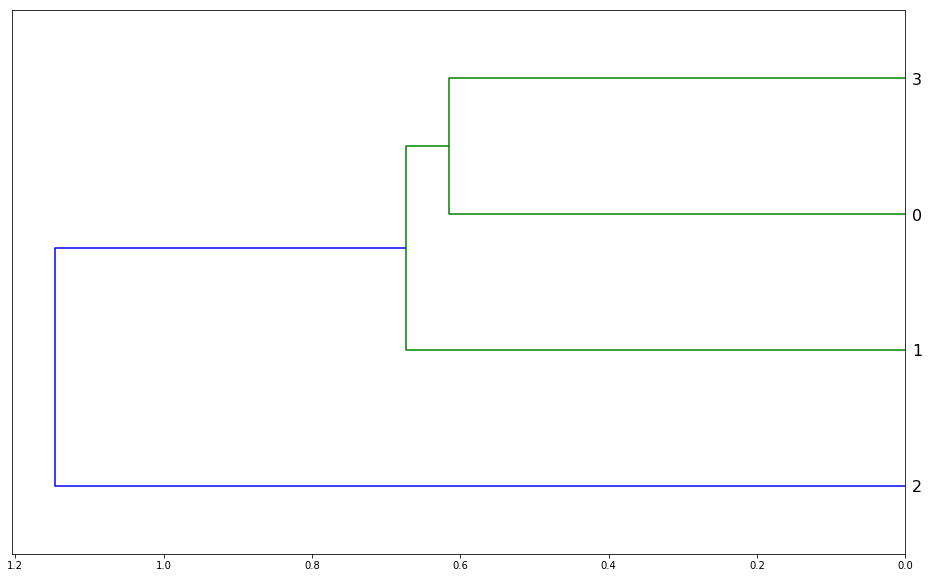

In [23]:
gender_corr = np.round(scipy.stats.spearmanr(X_gender_important_train).correlation, 4)
gender_corr_condensed = hc.distance.squareform(1-gender_corr)
z = hc.linkage(gender_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
gender_dendrogram = hc.dendrogram(z, labels=X_gender_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()

In [24]:
X_msi_train, X_msi_valid, y_msi_train, y_msi_valid = train_test_split(X_correct.values.astype(int),
                                                                      msi_correct,
                                                                      test_size=0.3)

In [ ]:
forest = RandomForestClassifier(n_estimators=500, 
                                n_jobs=-1, 
                                oob_score=True)

# sorted(forest.get_params().keys())

gs = GridSearchCV(estimator=forest,
                  param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
                               'max_features':[None, 0.5, 'sqrt', 'log2']}],
                  scoring='accuracy',
                  cv=5,)

gs = gs.fit(X_msi_train, y_msi_train)
print(gs.best_score_)
print(gs.best_params_)


 1) GBP1                           0.169255
 2) MYO1G                          0.134995
 3) UBE2L6                         0.085144
 4) CNDP2                          0.067607
 5) TMED1                          0.052030
 6) PTPRC                          0.043316
 7) CKB                            0.036228
 8) ADPGK                          0.033480
 9) ELP3                           0.023291
10) IFI30                          0.019228
11) TYMP                           0.014404
12) S100A12                        0.013309
13) LCP1                           0.011949
14) EVL                            0.011649
15) TAP1                           0.010300
16) MYO1F                          0.010111
17) TAPBP                          0.009992
18) CASK                           0.009839
19) SDF2L1                         0.009525
20) FRMPD3                         0.009228
21) OAS3                           0.007938
22) HAT1                           0.007845
23) PGD                         

<BarContainer object of 4118 artists>

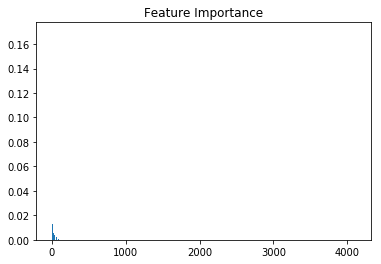

In [25]:
msi_forest = RandomForestClassifier(n_estimators=500,
                                min_samples_leaf=5,
                                max_features=None,
                                n_jobs=-1, 
                                oob_score=True)

msi_forest.fit(X_msi_train, y_msi_train)

msi_importances = msi_forest.feature_importances_
msi_indices = np.argsort(msi_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(100):
    print("%2d) %-*s %f" % (f + 1, 30, columns[msi_indices[f]], msi_importances[msi_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_msi_train.shape[1]), msi_importances[msi_indices], align='center')

In [26]:
y_msi_pred = msi_forest.predict(X_msi_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.79      0.94      0.86        16
          1       0.50      0.20      0.29         5

avg / total       0.72      0.76      0.72        21



In [27]:
msi_select = SelectFromModel(msi_forest, threshold=0.019)

msi_select.fit(X_msi_train, y_msi_train)

X_msi_important_train = msi_select.transform(X_msi_train)
X_msi_important_train_df = pd.DataFrame(X_msi_important_train)
X_msi_important_valid = msi_select.transform(X_msi_valid)

In [28]:
msi_forest.fit(X_msi_important_train, y_msi_train)
y_msi_pred = msi_forest.predict(X_msi_important_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))


k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.79      0.94      0.86        16
          1       0.50      0.20      0.29         5

avg / total       0.72      0.76      0.72        21



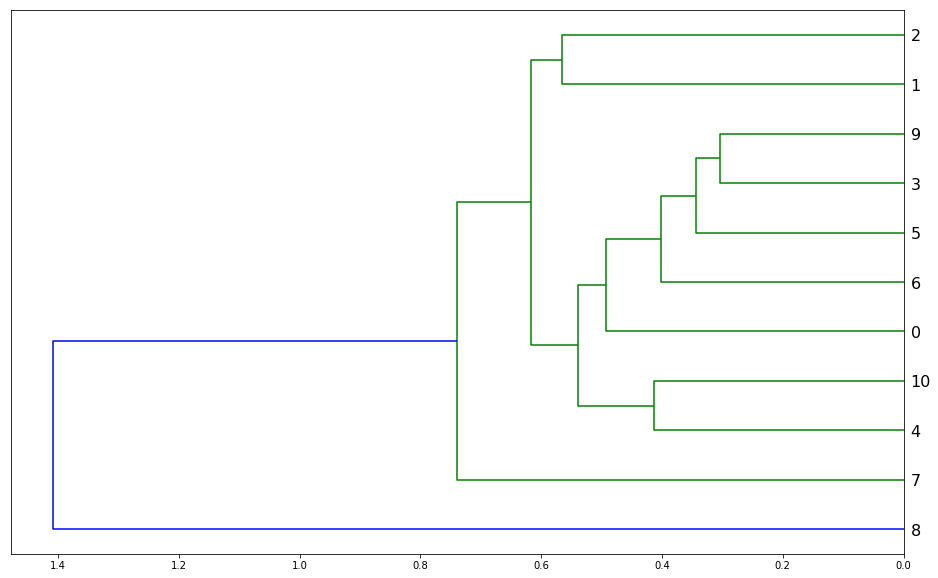

In [29]:
msi_corr = np.round(scipy.stats.spearmanr(X_msi_important_train).correlation, 4)
msi_corr_condensed = hc.distance.squareform(1-msi_corr)
msi_z = hc.linkage(msi_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
msi_dendrogram = hc.dendrogram(msi_z, labels=X_msi_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()

### msi
1. CASK                           0.064384
2. ADPGK                          0.061092
3. ANP32E                         0.048545
4. KLC4                           0.040509
5. TAP1                           0.038269
6. NCAPG                          0.037576
7. RAD50                          0.035045
8. FMNL1                          0.033152
9. GBP2                           0.030121
10. XPNPEP1                        0.029699
11. PTPRC                          0.025719

### gender
1. PPP1CC                         0.050713
2. AGRN                           0.037314
4. ARFIP1                         0.029830
5. CES2                           0.023406
6. MYO5B                          0.021966


In [33]:
train_final = train_combined [['msi', 'CASK', 'ADPGK', 'ANP32E', 'KLC4', 'TAP1', 'NCAPG', 'RAD50', 'FMNL1', 'GBP2', 'XPNPEP1', 'PTPRC',
                               'gender', 'PPP1CC', 'AGRN', 'ARFIP1', 'CES2', 'MYO5B']]

columns = train_final.columns

# train_final
# train_combined

In [34]:
X_final_train, X_final_valid, y_final_train, y_final_valid = train_test_split(train_final.values.astype(int),
                                                                              train_combined.mismatch.values, 
                                                                              test_size=0.3)

In [ ]:
forest = RandomForestClassifier(n_estimators=500, 
                                n_jobs=-1, 
                                oob_score=True)

# sorted(forest.get_params().keys())

gs = GridSearchCV(estimator=forest,
                  param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
                               'max_features':[None, 0.5, 'sqrt', 'log2']}],
                  scoring='accuracy',
                  cv=5,)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


 1) RAD50                          0.146304
 2) CES2                           0.129156
 3) MYO5B                          0.111445
 4) XPNPEP1                        0.087399
 5) ANP32E                         0.078285
 6) gender                         0.070542
 7) AGRN                           0.063113
 8) msi                            0.060046
 9) ADPGK                          0.058942
10) ARFIP1                         0.044022
11) CASK                           0.033939
12) TAP1                           0.032409
13) PTPRC                          0.025873
14) GBP2                           0.022659
15) FMNL1                          0.017254
16) KLC4                           0.014576


<BarContainer object of 18 artists>

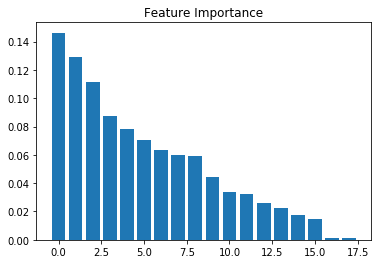

In [35]:
final_forest = RandomForestClassifier(n_estimators=500, 
                                      min_samples_leaf=3,
                                      max_features=None,
                                      n_jobs=-1,
                                      oob_score=True)

final_forest.fit(X_final_train, y_final_train)

final_importances = final_forest.feature_importances_
final_indices = np.argsort(final_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(16):
    print("%2d) %-*s %f" % (f + 1, 30, columns[final_indices[f]], final_importances[final_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_final_train.shape[1]), final_importances[final_indices], align='center')

In [36]:
y_final_pred = final_forest.predict(X_final_valid)
print('Random Forest: \n', classification_report(y_true=y_final_valid, y_pred=y_final_pred))

Random Forest: 
              precision    recall  f1-score   support

          0       0.75      1.00      0.86        18
          1       0.00      0.00      0.00         6

avg / total       0.56      0.75      0.64        24



/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
final_select = SelectFromModel(final_forest, threshold=0.019)

final_select.fit(X_final_train, y_final_train)

X_final_important_train = final_select.transform(X_final_train)
X_final_important_train_df = pd.DataFrame(X_final_important_train)
X_final_important_valid = final_select.transform(X_final_valid)

In [38]:
final_forest.fit(X_final_important_train, y_final_train)
y_final_pred = final_forest.predict(X_final_important_valid)
print('Random Forest: \n', classification_report(y_true=y_final_valid, y_pred=y_final_pred))
print('OOB score: ', final_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       0.75      1.00      0.86        18
          1       0.00      0.00      0.00         6

avg / total       0.56      0.75      0.64        24

OOB score:  0.8928571428571429


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


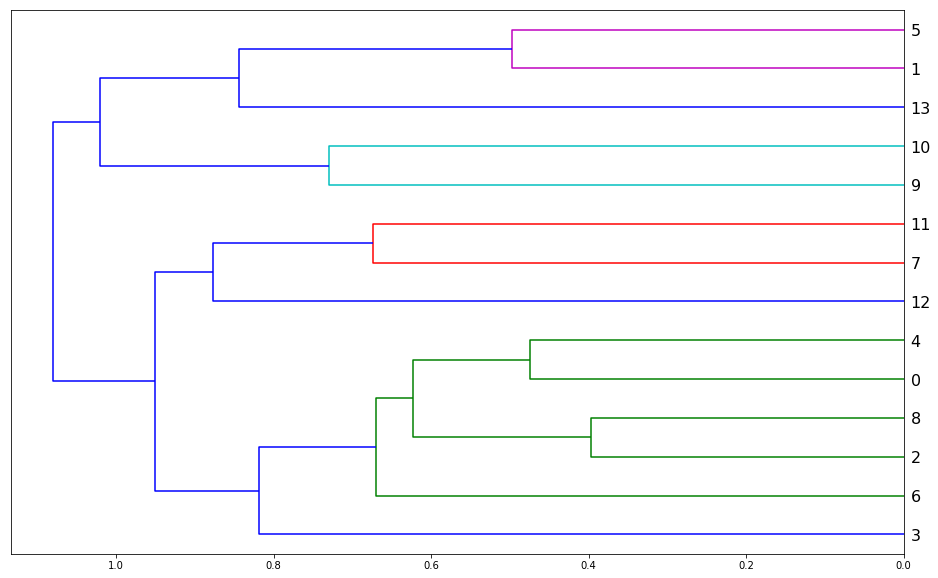

In [39]:
final_corr = np.round(scipy.stats.spearmanr(X_final_important_train).correlation, 4)
final_corr_condensed = hc.distance.squareform(1-final_corr)
final_z = hc.linkage(final_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
final_dendrogram = hc.dendrogram(final_z, labels=X_final_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()

### final parameters based on the importance on full dataset 

1. ANP32E                         0.202813
2. msi                            0.122349
3. AGRN                           0.104420
4. RAD50                          0.087882
5. CASK                           0.066713
6. MYO5B                          0.065782
7. XPNPEP1                        0.063634
8. FMNL1                          0.049491
9. CES2                           0.046209
10. GBP2                          0.031256
11. KLC4                          0.031149
12. ARFIP1                        0.030896
13. gender                        0.023883


In [43]:
train_final2 = train_combined [['gender',
                                'ANP32E', 
                                'AGRN', 
                                'RAD50', 
                                'CASK', 
                                'MYO5B', 
                                'XPNPEP1', 
                                'FMNL1', 
                                'CES2', 
                                'GBP2',
                                'KLC4', 
                                'ARFIP1',
                                'msi']]


columns = train_final2.columns

# train_final2
# train_combined

In [44]:
X_final2_train, X_final2_valid, y_final2_train, y_final2_valid = train_test_split(train_final2.values.astype(int),
                                                                                  train_combined.mismatch.values, 
                                                                                  test_size=0.3)

In [45]:
# final2_forest = RandomForestClassifier(n_estimators=500, 
#                                 n_jobs=-1, 
#                                 oob_score=True)

# # sorted(forest.get_params().keys())

# gs = GridSearchCV(estimator=final2_forest,
#                   param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
#                                'max_features':[None, 0.5, 'sqrt', 'log2']}],
#                   scoring='accuracy',
#                   cv=5,)

# gs = gs.fit(X_final2_train, y_final2_train)
# print(gs.best_score_)
# print(gs.best_params_)


 1) ANP32E                         0.331465
 2) msi                            0.242624
 3) RAD50                          0.101671
 4) MYO5B                          0.082674
 5) CES2                           0.049331
 6) ARFIP1                         0.047512
 7) KLC4                           0.037697
 8) GBP2                           0.028671
 9) XPNPEP1                        0.024866
10) FMNL1                          0.020829
11) CASK                           0.019417
12) gender                         0.013243


<BarContainer object of 12 artists>

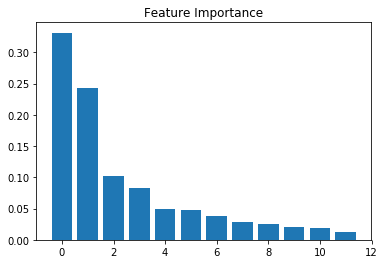

In [46]:
final2_forest = RandomForestClassifier(n_estimators=500, 
                                      min_samples_leaf=5,
                                      max_features=None,
                                      n_jobs=-1,
                                      oob_score=True)

final2_forest.fit(X_final2_train, y_final2_train)

final2_importances = final2_forest.feature_importances_
final2_indices = np.argsort(final2_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30, columns[final2_indices[f]], final2_importances[final2_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_final2_train.shape[1]), final2_importances[final2_indices], align='center')

In [47]:
y_final2_pred = final2_forest.predict(X_final2_valid)
print('Random Forest: \n', classification_report(y_true=y_final2_valid, y_pred=y_final2_pred))
print('OOB score: ', final2_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       0.79      1.00      0.88        19
          1       0.00      0.00      0.00         5

avg / total       0.63      0.79      0.70        24

OOB score:  0.875


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
final2_select = SelectFromModel(final2_forest, threshold=0.04)

final2_select.fit(X_final2_train, y_final2_train)

X_final2_important_train = final2_select.transform(X_final2_train)
X_final2_important_train_df = pd.DataFrame(X_final2_important_train)
X_final2_important_valid = final2_select.transform(X_final2_valid)

In [49]:
final2_forest.fit(X_final2_important_train, y_final2_train)
y_final2_pred = final2_forest.predict(X_final2_important_valid)
print('Random Forest: \n', classification_report(y_true=y_final2_valid, y_pred=y_final2_pred))
print('OOB score: ', final2_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       0.79      1.00      0.88        19
          1       0.00      0.00      0.00         5

avg / total       0.63      0.79      0.70        24

OOB score:  0.875


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
